Autores: Augusto Rodrigues de Oliveira e Kayke Bonafé de Luca

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

In [2]:
df = pd.read_excel('AP_BD2_Parte2.xlsx')

In [3]:
#Primeiras 5 linhas do Dataset
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Desfecho
0,2.57,492,2,59,15633,0.91,119.3,0.07,1,1
1,2.57,492,2,59,15633,0.91,119.3,0.07,1,1
2,2.57,492,2,59,15633,0.91,119.3,0.06,1,1
3,2.57,492,2,59,15633,0.91,119.3,0.06,1,1
4,2.57,492,2,59,15633,0.91,119.3,0.05,1,1


In [4]:
#Descrição da média, desvio padrão, quartiles, mínimo, máximo e quantidade de observações em cada variável
#Pela quantidade na variável V7, é possível notar que existem valores nulos
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Desfecho
count,2.157800e+04,21578.0,21578.0,21578.0,21578.0,2.157800e+04,21577.000000,21578.000000,21578.0,21578.000000
mean,2.570000e+00,492.0,2.0,59.0,15633.0,9.100000e-01,119.230273,0.080643,1.0,0.000881
std,2.637951e-13,0.0,0.0,0.0,0.0,1.264573e-13,1.978065,0.197035,0.0,0.029661
min,2.570000e+00,492.0,2.0,59.0,15633.0,9.100000e-01,19.850000,0.000000,1.0,0.000000
25%,2.570000e+00,492.0,2.0,59.0,15633.0,9.100000e-01,119.300000,0.060000,1.0,0.000000
50%,2.570000e+00,492.0,2.0,59.0,15633.0,9.100000e-01,119.300000,0.080000,1.0,0.000000
75%,2.570000e+00,492.0,2.0,59.0,15633.0,9.100000e-01,119.300000,0.080000,1.0,0.000000
max,2.570000e+00,492.0,2.0,59.0,15633.0,9.100000e-01,119.300000,13.230000,1.0,1.000000


In [5]:
#Remoção da linha com valor nulo
df.dropna(inplace=True)

In [6]:
scaler = StandardScaler()
x = df.loc[:,["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9"]].values
x_conceptProof = scaler.fit_transform(x) #Transforma todas as variáveis em x, padronizando-as de acordo com o algoritmo Standard Scaler

In [7]:
'''
Correlação das variáveis com a classe Desfecho
Existe um indício que as variáveis que possuem algum tipo de correlação com a classe
são as variáveis V1, V6, V7 e V8

Como a correlação de V1 e V6 entre o desfecho apresenta valores extremamente próximos de 0,
ambas as variáveis também podem ser descartadas, visto que seu impacto no treinamento será 
mínimo.

Pode-se provar esta afirmação ao utilizar o algoritmo Random Forest.
'''

df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Desfecho
V1,1.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,3.810395e-12,9.959401e-14,NaN,1.026308e-14
V2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V6,1.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,3.808606e-12,1.003711e-13,NaN,1.604244e-15
V7,3.810395e-12,NaN,NaN,NaN,NaN,3.808606e-12,1.000000e+00,1.584077e-03,NaN,1.046510e-03
V8,9.959401e-14,NaN,NaN,NaN,NaN,1.003711e-13,1.584077e-03,1.000000e+00,NaN,-2.237969e-03
V9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Desfecho,1.026308e-14,NaN,NaN,NaN,NaN,1.604244e-15,1.046510e-03,-2.237969e-03,NaN,1.000000e+00


**Random Forest - Prova de conceito**

"Random Forest é uma combinação de preditores de árvores, de modo que cada árvore depende dos valores de um vetor aleatório amostrado independentemente e com a mesma distribuição para todas as árvores da floresta." - https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

Após utilizar o algoritmo, verificou-se que apenas a V8 exerce algum tipo de influência no Desfecho. 
Esta afirmação tem seu embasamento na significância retornada pelo algoritmo.

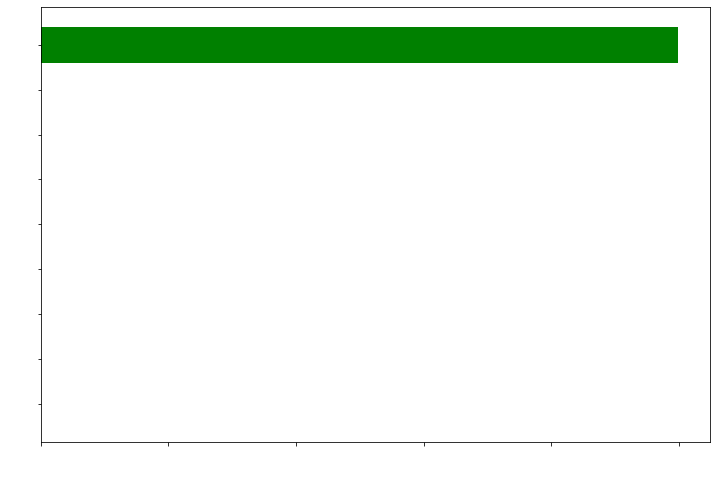

In [8]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42) # define the seed (important to reproduce the results)
# define os parâmetros do modelo
model = RandomForestClassifier()
model.fit(x_conceptProof, df["Desfecho"].values)

importances = model.feature_importances_
indices = np.argsort(importances)

features_names = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9"]
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15, color='white')
plt.xticks(color='white', size=20)
plt.yticks(color='white', size=20)
plt.show()

**Voltando à analise do Dataset**

In [9]:
def standardScaler(df):
    scaler = StandardScaler()
    x = df.loc[:,["V8"]].values
    x = scaler.fit_transform(x)

    y = df["Desfecho"].values
    return x, y

x, y = standardScaler(df)

In [10]:
from sklearn.model_selection import train_test_split
#Dividindo os dados entre treino e teste é possível separar um conjunto de observações onde o desfecho é conhecido, e outro onde o mesmo não é conhecido
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)#Por convenção, divide-se até 30% da base para testes e o restante para treino

**Regressão Logística**

"A regressão logística(neste caso, o categórico) é usada quando a variável dependente(destino) é categórica." - https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

Precisão do modelo:  99.93821439604572 %
Matriz de Confusão: 



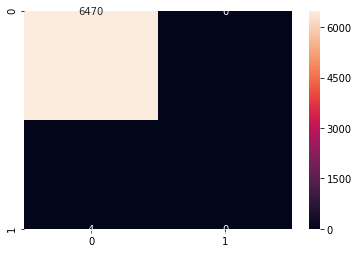

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
def logisticRegression(X_train, y_train, X_test, y_test):
    regression = LogisticRegression()
    regression.fit(X_train, y_train)
    print("Precisão do modelo: " ,regression.score(X_test, y_test)*100, "%")
    
    conf_matrix = confusion_matrix(y_test, regression.predict(X_test))
    print("Matriz de Confusão: \n")
    sns.heatmap(conf_matrix, annot=True, fmt = "d")
    
    plt.show()
    
logisticRegression(X_train, y_train, X_test, y_test)

**SVM**

"Uma SVM (Support Vector Machine) é um classificador discriminativo formalmente definido por um hiperplano de separação. Em outras palavras, dados dados de treinamento rotulados (aprendizado supervisionado), o algoritmo gera um hiperplano ideal que categoriza novos exemplos. No espaço bidimensional, esse hiperplano é uma linha que divide um plano em duas partes, onde cada classe fica em cada lado." - https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72


Precisão do modelo: 99.93821439604572 %
Matriz de Confusão: 



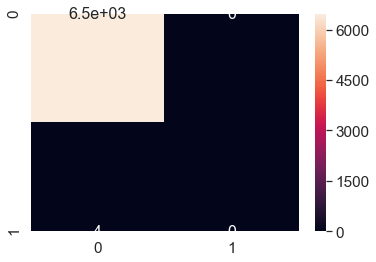

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
def svm(X_train, y_train, X_test, y_test):
    svm_class = SVC(gamma = 'auto')
    svm_class.fit(X_train, y_train)

    print("Precisão do modelo:" ,svm_class.score(X_test, y_test)*100, "%")
    
    conf_matrix = confusion_matrix(y_test, svm_class.predict(X_test))
    print("Matriz de Confusão: \n")
    
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix, annot = True, annot_kws = {"size": 16})

    plt.show()
    #Na primeira coluna, o valor da primeira linha representa o número de verdadeiros-positivos do Desfecho 0. 
    #Na segunda linha da primeira coluna está o valor de falsos-negativos do Desfecho 1.
    #Na segunda coluna, o valor da primeira linha representa os falsos-positivos do Desfecho 0.
    #Na segunda linha da segunda coluna está o valor de verdadeiros-negativos do Desfecho 1.

    #Com isso concluímos que o algoritmo acerta da observações de teste 4878 classes do desfecho 0 e 11 classes do desfecho 1
    #sendo que no total, temos a classe 0 possui 4878 valores e a classe 1 possui 1596 valores.

svm(X_train, y_train, X_test, y_test)

**LDA - Linear Discriminant Analysis**

"“Linear Discriminant Analysis” é um algoritmo estatístico multivariado de extração de características. Sua extração diferencia duas ou mais classes de interesse, maximizando a distância entre as classes e minimizando a dispersão em cada grupo através da transformação linear." - https://fei.edu.br/~cet/sbai11_ElianaTenorio.pdf




Precisão do modelo: 99.93821439604572 %
Matriz de Confusão: 



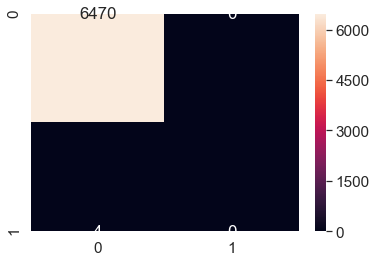

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def linearDiscriminantAnalysis(X_train, y_train, X_test, y_test):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    print("Precisão do modelo:" ,lda.score(X_test, y_test)*100, "%")
    
    lda_df = lda.transform(X_train)
    lda_df.shape
    
    #Vizualiação da nuvem de pontos do LDAxClasse
    plt.scatter(lda_df, y_train)
    
    conf_matrix = confusion_matrix(y_test,lda.predict(X_test))
    print("Matriz de Confusão: \n")
    sns.heatmap(conf_matrix, annot=True, fmt = "d")
    
linearDiscriminantAnalysis(X_train, y_train, X_test, y_test)

**Random Forest**

Precisão do modelo: 99.93821439604572 %
Matriz de Confusão: 



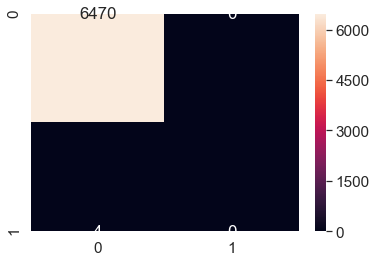

In [14]:
from sklearn.ensemble import RandomForestClassifier
def randomForest(X_train, y_train, X_test, y_test):
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)

    print("Precisão do modelo:" ,random_forest.score(X_test, y_test)*100, "%")
    
    conf_matrix = confusion_matrix(y_test, random_forest.predict(X_test))
    print("Matriz de Confusão: \n")
    
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix, annot=True, fmt = "d")

    plt.show()
    
    return random_forest
    
random_unbalanced = randomForest(X_train, y_train, X_test, y_test)

**Realizando o Balanceamento da Base**

Para realizar o balanceamento da base foi utilizada uma técnica chamada SMOTE(Synthetic Minority Over-Sampling Technique), que basicamente utiliza o knn para balancear a base. - https://medium.com/analytics-vidhya/balance-your-data-using-smote-98e4d79fcddb

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=3, random_state = 42)

x, y = sm.fit_sample(x, y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

**Regressão Logística com a base balanceada**

Precisão do modelo:  55.02126014688828 %
Matriz de Confusão: 



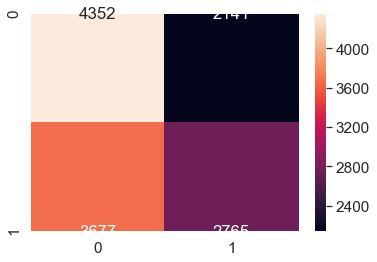

In [16]:
logisticRegression(X_train, y_train, X_test, y_test)

**SVM com a base balanceada**

Precisão do modelo: 67.06609972941632 %
Matriz de Confusão: 



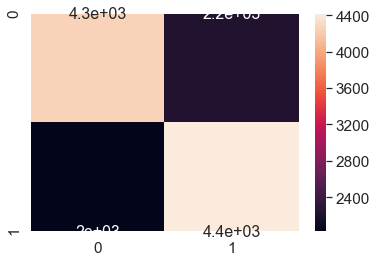

In [17]:
svm(X_train, y_train, X_test, y_test)

**LDA com a base balanceada**

Precisão do modelo: 62.97642056436026 %
Matriz de Confusão: 



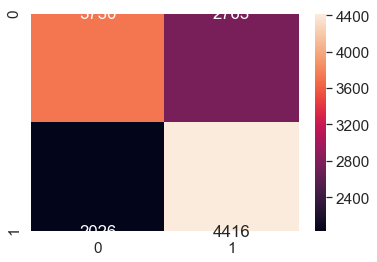

In [18]:
linearDiscriminantAnalysis(X_train, y_train, X_test, y_test)

**Random Forest com a base balanceada**

Precisão do modelo: 71.31039814456899 %
Matriz de Confusão: 



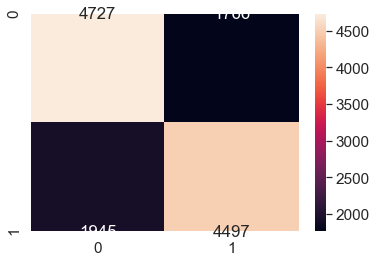

In [19]:
random = randomForest(X_train, y_train, X_test, y_test)

**Comparação de precisão e acurácia de casos raros**

In [20]:
x, y = standardScaler(df)

In [21]:
#Precisão do Random Forest treinado na base balanceada e categorizando a base desbalanceada
random.score(x, y)

0.7325856235806646

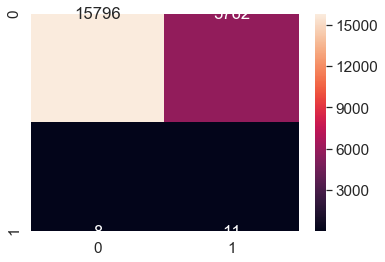

In [22]:
conf_matrix = confusion_matrix(y, random.predict(x))
sns.heatmap(conf_matrix, annot=True, fmt = "d")

In [23]:
#Precisão do Random Forest treinando na base desbalanceada e categorizando a base desbalanceada
random_unbalanced.score(x, y)

0.999119432729295

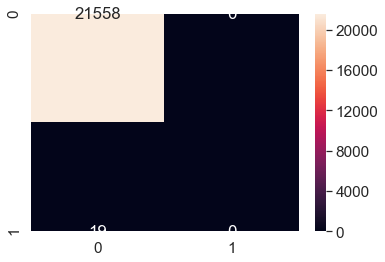

In [24]:
conf_matrix = confusion_matrix(y, random_unbalanced.predict(x))
sns.heatmap(conf_matrix, annot=True, fmt = "d")

In [25]:
df = pd.read_excel("AP_BD2_Parte2.xlsx")

In [34]:
import sqlite3
conn = sqlite3.connect('AP_BD2_DataBase.db')

In [35]:
c = conn.cursor()

for i in range(df.shape[0]):
    c.execute("INSERT INTO AP_BD2_TAB VALUES ('"+ str(df['V1'][i]) + "', '"+ str(df['V2'][i]) + "', '"+ str(df['V3'][i]) + "', '"+ str(df['V4'][i]) + "', '"+ str(df['V5'][i]) + "', '"+ str(df['V6'][i]) + "', '"+ str(df['V7'][i]) + "', '"+ str(df['V8'][i]) + "', '"+ str(df['V9'][i]) + "', '"+ str(df['Desfecho'][i]) + "')")
    
conn.commit()
conn.close()

In [42]:
dataFrame = pd.DataFrame(random.predict(x), columns = ["Desfecho"])
dataFrame.to_excel("AP_BD2_Parte2_Processada.xlsx", index = False)

**Conclusão**

Pode-se verificar que o Random Forest treinado na base balanceada acerta 11 de 19 casos raros, enquanto o mesmo modelo treinado na base desbalanceada acerta 0 de 19.